<a href="https://colab.research.google.com/github/naomi-fabiolatn/Masters/blob/main/RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE, MATRICULA: Edwin David Hernández Alejandre. A01794692
*   NOMBRE, MATRÍCULA: Naomi Fabiola Tokunaga Nuñez. A00826875
*   NOMBRE, MATRÍCULA: Luis Gerardo Barbosa Mendoza. A01731203

In [ ]:
#Habilitar solo si se usa google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Habilitar solo si usas un archivo local
import os
DIR = "C:\\Git\\TecMonterrrey\\CienciaAnaliticaDatos\\actividades-edwinhdez"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Genera estadisticas descriptivas para todas las variables del dataframe
data_df.describe(include='all')


diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count        569   569.000000    569.000000      569.000000   569.000000   
unique         2          NaN           NaN             NaN          NaN   
top            B          NaN           NaN             NaN          NaN   
freq         357          NaN           NaN             NaN          NaN   
mean         NaN    14.127292     19.289649       91.969033   654.889104   
std          NaN     3.524049      4.301036       24.298981   351.914129   
min          NaN     6.981000      9.710000       43.790000   143.500000   
25%          NaN    11.700000     16.170000       75.170000   420.300000   
50%          NaN    13.370000     18.840000       86.240000   551.100000   
75%          NaN    15.780000     21.800000      104.100000   782.700000   
max          NaN    28.110000     39.280000      188.500000  2501.000000   

        smoothness_mean  compactness_mean  concavity_mean  \
count        569.000000        569.000000      569.000000   
unique              NaN               NaN             NaN   
top                 NaN               NaN             NaN   
freq                NaN               NaN             NaN   
mean           0.096360          0.104341        0.088799   
std            0.014064          0.052813        0.079720   
min            0.052630          0.019380        0.000000   
25%            0.086370          0.064920        0.029560   
50%            0.095870          0.092630        0.061540   
75%            0.105300          0.130400        0.130700   
max            0.163400          0.345400        0.426800   

        concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
count            569.000000     569.000000  ...    569.000000     569.000000   
unique                  NaN            NaN  ...           NaN            NaN   
top                     NaN            NaN  ...           NaN            NaN   
freq                    NaN            NaN  ...           NaN            NaN   
mean               0.048919       0.181162  ...     16.269190      25.677223   
std                0.038803       0.027414  ...      4.833242       6.146258   
min                0.000000       0.106000  ...      7.930000      12.020000   
25%                0.020310       0.161900  ...     13.010000      21.080000   
50%                0.033500       0.179200  ...     14.970000      25.410000   
75%                0.074000       0.195700  ...     18.790000      29.720000   
max                0.201200       0.304000  ...     36.040000      49.540000   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
unique              NaN          NaN               NaN                NaN   
top                 NaN          NaN               NaN                NaN   
freq                NaN          NaN               NaN                NaN   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
unique              NaN                   NaN             NaN   
top                 NaN                   NaN             NaN   
freq                NaN                   NaN             NaN   
mean           0.272188              0.114606        0.290076   
std            0.208624              0.065732        0.061867   
min            0.000

1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
# Calculamos el numero de valores unicos por cada variable
data_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [ ]:
# Identificamos las varibales que podrian ser catagoricas
data_df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# Obtenemos los valores unicos de la variable diagnosis
data_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

1c) Búsqueda de valores faltantes.

In [ ]:
 # Obtenemos el numero de valores faltantes por cada variable en porcentaje respecto al numero total de registros
data_df.isnull().sum()/data_df.shape[0]*100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [ ]:
# Confirmamos el numero de registros y columnas del dataframe
data_df.shape

(569, 31)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

No se detectaron valores faltantes

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

In [ ]:
# 1. Obtiene el numero de registros del dataframe
data_df.shape[0]
print('Hay', data_df.shape[0], 'observaciones en la base de datos.')

# 2. Obtiene el numero de variables del dataframe
data_df.shape[1]
print('Hay', data_df.shape[1], 'variables en la base de datos.')

# 3. Obtiene el nombre de las variables del dataframe
data_df.columns
print('Las variables de la base de datos son:', list(data_df.columns))

# 4. Obtiene el tipo de dato de cada variable
data_df.dtypes
print('Los tipos de datos de las variables son:', list(data_df.dtypes))

# 5. Obtiene el numero de variables categoricas y numericas
data_df.dtypes.value_counts()
print('Hay', data_df.dtypes.value_counts()[0], 'variables categoricas')

Hay 569 observaciones en la base de datos.
Hay 31 variables en la base de datos.
Las variables de la base de datos son: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Los tipos de datos de las variables son: [dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'

C:\Users\edwin\AppData\Local\Temp\ipykernel_55504\572247754.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Hay', data_df.dtypes.value_counts()[0], 'variables categoricas')


In [ ]:
# Disabling warnings
import warnings
warnings.simplefilter("ignore")

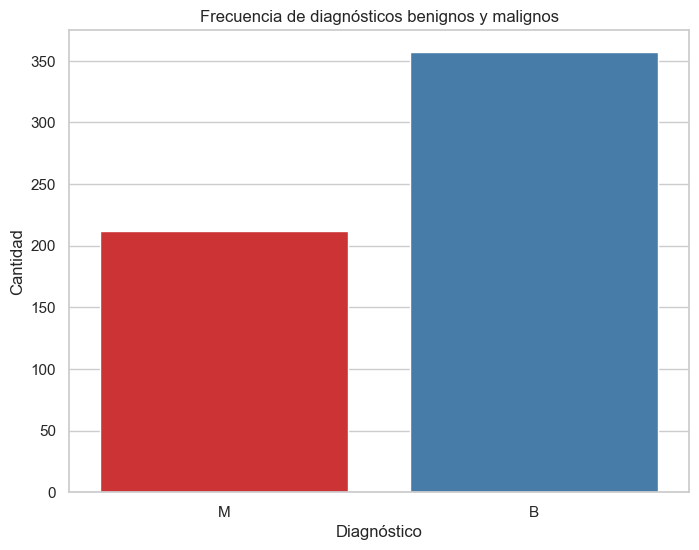

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Estilo de fondo

sns.countplot(data=data_df, x="diagnosis", palette="Set1")  # Crear el gráfico de barras

plt.title("Frecuencia de diagnósticos benignos y malignos")
plt.xlabel("Diagnóstico")
plt.ylabel("Cantidad")
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

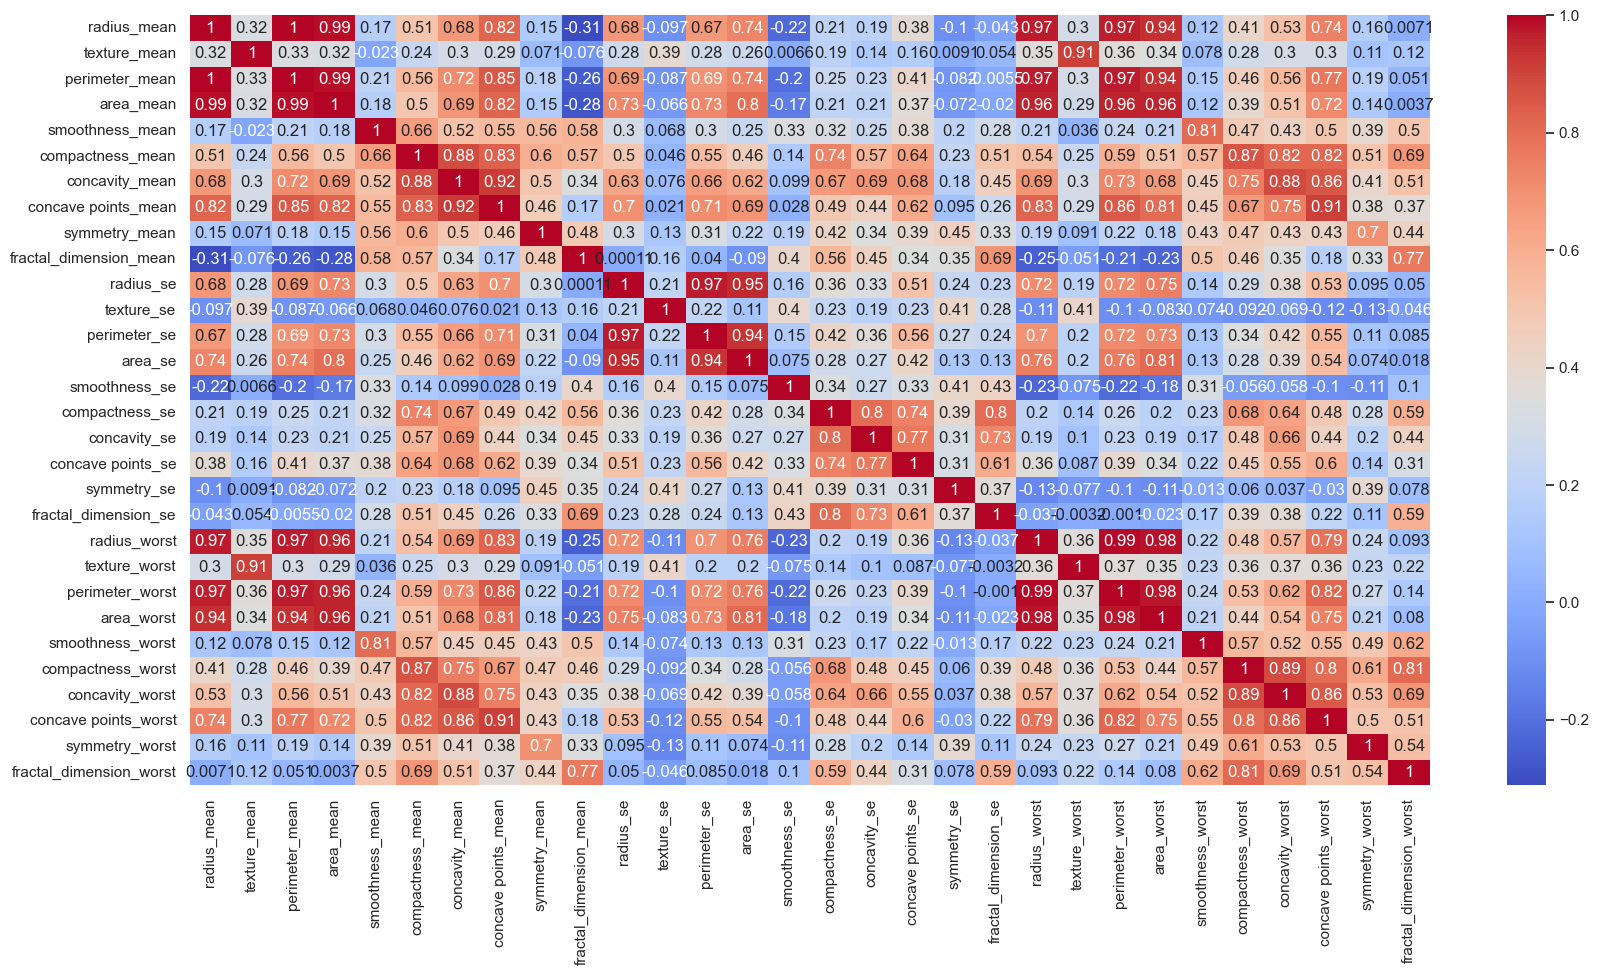

In [ ]:
# Elabora un mapa de calor para identificar las variables que tienen una correlacion alta de las variables numericas
# Mapa de calor con las correlacion de las variables numericas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_cols = data_df.select_dtypes(include=['float64', 'int64'])

# Crear un mapa de calor con las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
def find_highly_correlated(data_df, threshold=0.9):
    # Seleccionar solo las columnas numéricas
    numeric_cols = data_df.select_dtypes(include=['float64', 'int64'])

    correlation_matrix = numeric_cols.corr()

    # Encuentra las variables con correlación mayor a threshold o menor a -threshold
    highly_correlated = [(column1, column2, round(correlation_matrix[column1][column2], 2))
                         for column1 in correlation_matrix.columns
                         for column2 in correlation_matrix.columns
                         if (correlation_matrix[column1][column2] > threshold or correlation_matrix[column1][column2] < -threshold)
                         and column1 != column2]

    # Mostrar el resultado en forma descendente
    highly_correlated.sort(key=lambda x: x[0], reverse=True)

    # Imprimir cada par de columnas altamente correlacionadas y su valor de correlación
    for column1, column2, correlation in highly_correlated:
        print(f"Las columnas '{column1}' y '{column2}' tienen una correlación de {correlation}")

    return highly_correlated

In [ ]:
highly_correlated = find_highly_correlated(data_df, threshold=0.9)

Las columnas 'texture_worst' y 'texture_mean' tienen una correlación de 0.91
Las columnas 'texture_mean' y 'texture_worst' tienen una correlación de 0.91
Las columnas 'radius_worst' y 'radius_mean' tienen una correlación de 0.97
Las columnas 'radius_worst' y 'perimeter_mean' tienen una correlación de 0.97
Las columnas 'radius_worst' y 'area_mean' tienen una correlación de 0.96
Las columnas 'radius_worst' y 'perimeter_worst' tienen una correlación de 0.99
Las columnas 'radius_worst' y 'area_worst' tienen una correlación de 0.98
Las columnas 'radius_se' y 'perimeter_se' tienen una correlación de 0.97
Las columnas 'radius_se' y 'area_se' tienen una correlación de 0.95
Las columnas 'radius_mean' y 'perimeter_mean' tienen una correlación de 1.0
Las columnas 'radius_mean' y 'area_mean' tienen una correlación de 0.99
Las columnas 'radius_mean' y 'radius_worst' tienen una correlación de 0.97
Las columnas 'radius_mean' y 'perimeter_worst' tienen una correlación de 0.97
Las columnas 'radius_mean

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

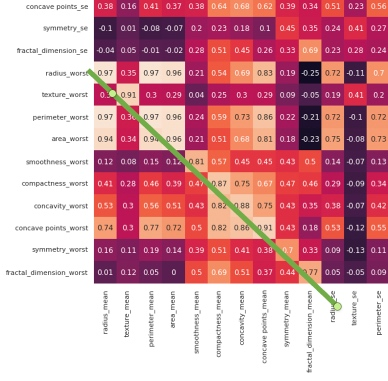

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


In [ ]:
# Se realiza un analisis VIF para identificar las variables que tienen una correlacion alta de las variables numericas
# Analisis VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las columnas numéricas
numeric_cols = data_df.select_dtypes(include=['float64', 'int64'])

# Crear un dataframe para almacenar los resultados
vif_data = pd.DataFrame()

# Agregar el nombre de las columnas como indice
vif_data["feature"] = numeric_cols.columns

# Calcular el VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(len(numeric_cols.columns))]

# Ordenar de forma descendente por el valor del VIF
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

# Mostrar el resultado
vif_data


feature           VIF
0               radius_mean  63306.172036
2            perimeter_mean  58123.586079
20             radius_worst   9674.742602
22          perimeter_worst   4487.781270
3                 area_mean   1287.262339
23               area_worst   1138.759252
9    fractal_dimension_mean    629.679874
29  fractal_dimension_worst    423.396723
4           smoothness_mean    393.398166
24         smoothness_worst    375.597155
21            texture_worst    343.004387
1              texture_mean    251.047108
10                radius_se    236.665738
28           symmetry_worst    218.919805
12             perimeter_se    211.396334
5          compactness_mean    200.980354
8             symmetry_mean    184.426558
6            concavity_mean    157.855046
7       concave points_mean    154.241268
27     concave points_worst    148.673180
25        compactness_worst    132.884276
26          concavity_worst     86.310362
13                  area_se     72.466468
17        concave points_se     53.698656
15           compactness_se     44.919651
18              symmetry_se     37.176452
16             concavity_se     33.244099
19     fractal_dimension_se     27.532631
14            smoothness_se     26.170243
11               texture_se     24.675367

# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
# Eliminamos todas las columnas _worst del dataset
data_df_backup1 = data_df.copy()
data_df.drop(data_df.columns[data_df.columns.str.contains('_worst')], axis=1, inplace=True)

In [ ]:
# Confirma que se hayan eliminado las columnas
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




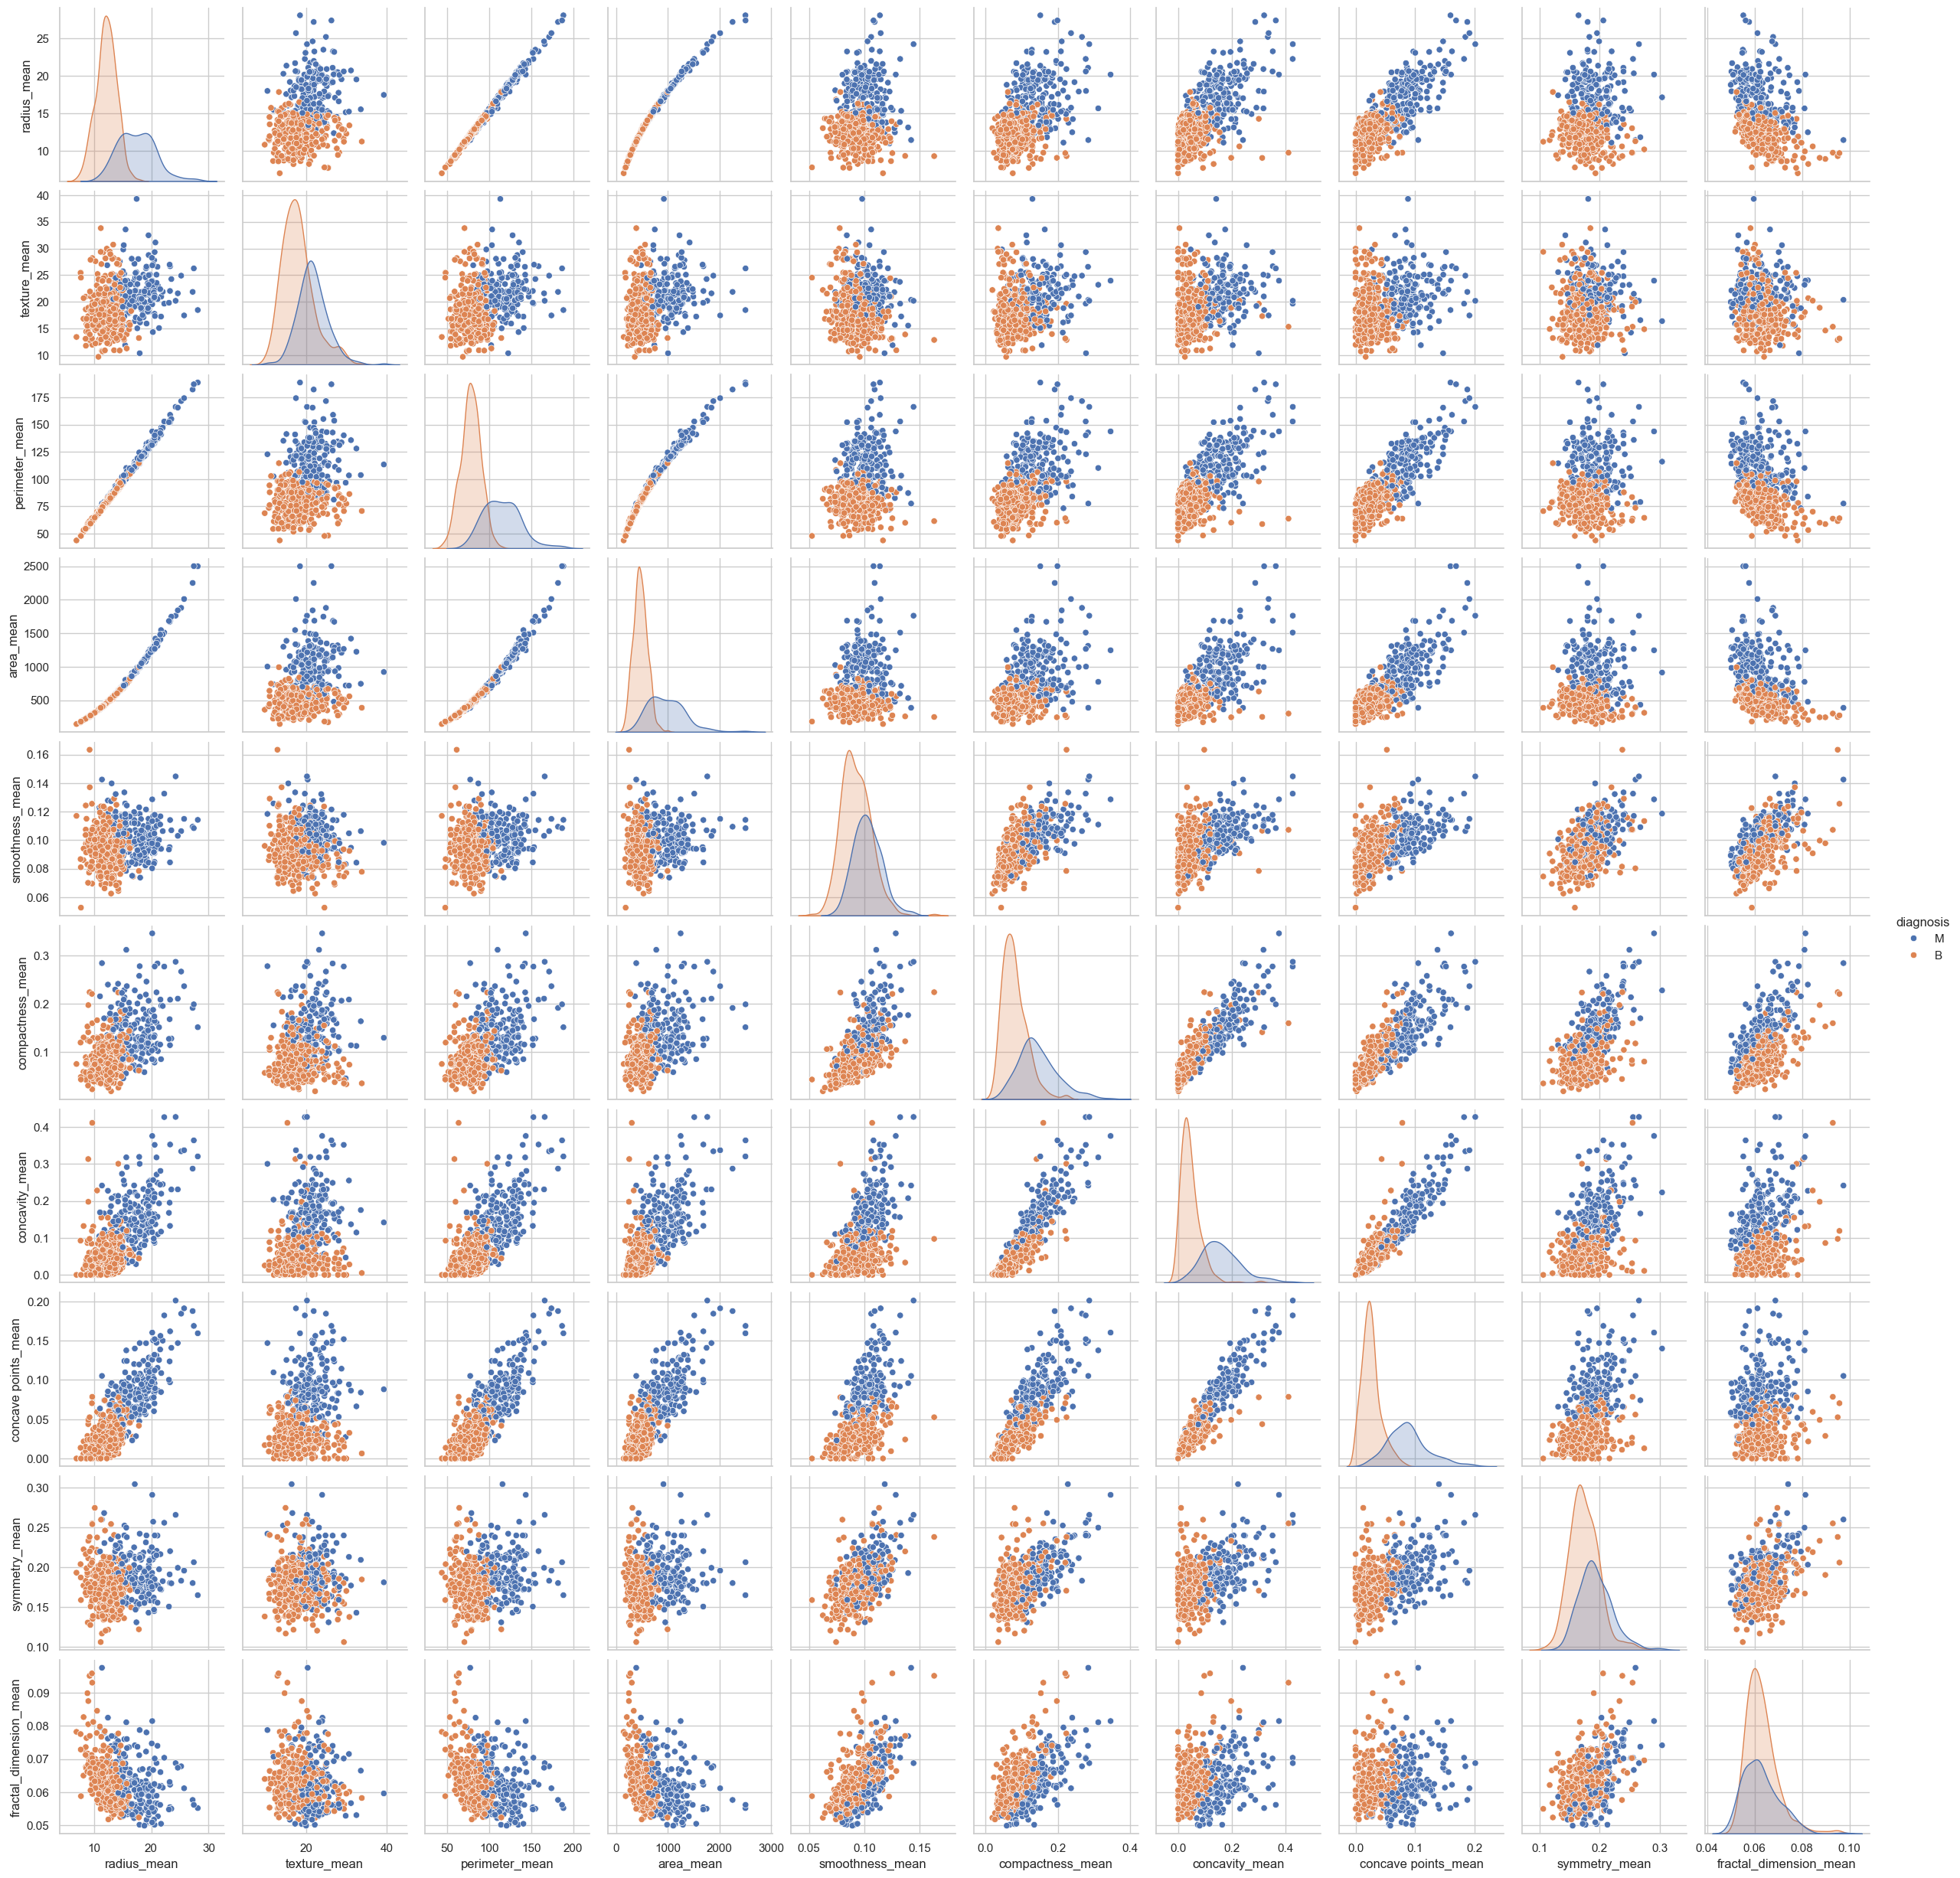

In [ ]:
# Generamos el diagrama de dispersion para todas las variables numericas mean
sns.pairplot(data_df, hue="diagnosis", vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


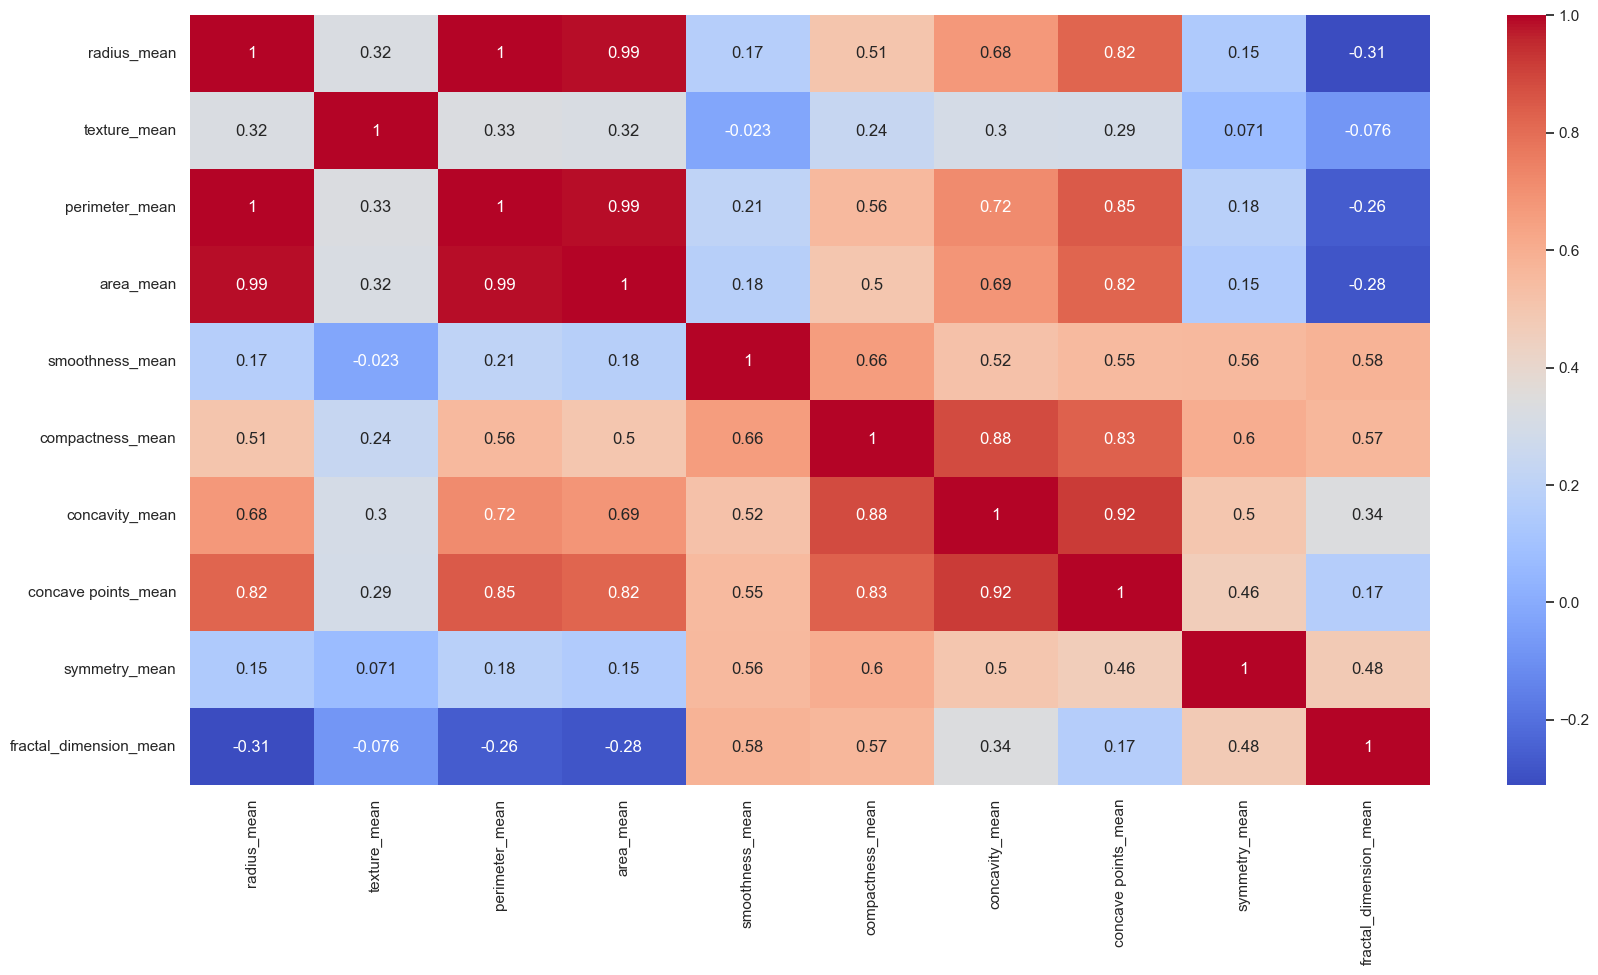

In [ ]:
# Elabora un mapa de calor para identificar las variables que tienen una correlacion alta de las variables numericas
# Mapa de calor con las correlacion de las variables numericas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_var= data_df.select_dtypes(include=['float64', 'int64'])

variable_means = numeric_var[numeric_var.columns[numeric_var.columns.str.contains('mean')]]

# Crear un mapa de calor con las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(variable_means.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
find_highly_correlated(variable_means, threshold=0.8)

Las columnas 'radius_mean' y 'perimeter_mean' tienen una correlación de 1.0
Las columnas 'radius_mean' y 'area_mean' tienen una correlación de 0.99
Las columnas 'radius_mean' y 'concave points_mean' tienen una correlación de 0.82
Las columnas 'perimeter_mean' y 'radius_mean' tienen una correlación de 1.0
Las columnas 'perimeter_mean' y 'area_mean' tienen una correlación de 0.99
Las columnas 'perimeter_mean' y 'concave points_mean' tienen una correlación de 0.85
Las columnas 'concavity_mean' y 'compactness_mean' tienen una correlación de 0.88
Las columnas 'concavity_mean' y 'concave points_mean' tienen una correlación de 0.92
Las columnas 'concave points_mean' y 'radius_mean' tienen una correlación de 0.82
Las columnas 'concave points_mean' y 'perimeter_mean' tienen una correlación de 0.85
Las columnas 'concave points_mean' y 'area_mean' tienen una correlación de 0.82
Las columnas 'concave points_mean' y 'compactness_mean' tienen una correlación de 0.83
Las columnas 'concave points_mean

[('radius_mean', 'perimeter_mean', 1.0),
 ('radius_mean', 'area_mean', 0.99),
 ('radius_mean', 'concave points_mean', 0.82),
 ('perimeter_mean', 'radius_mean', 1.0),
 ('perimeter_mean', 'area_mean', 0.99),
 ('perimeter_mean', 'concave points_mean', 0.85),
 ('concavity_mean', 'compactness_mean', 0.88),
 ('concavity_mean', 'concave points_mean', 0.92),
 ('concave points_mean', 'radius_mean', 0.82),
 ('concave points_mean', 'perimeter_mean', 0.85),
 ('concave points_mean', 'area_mean', 0.82),
 ('concave points_mean', 'compactness_mean', 0.83),
 ('concave points_mean', 'concavity_mean', 0.92),
 ('compactness_mean', 'concavity_mean', 0.88),
 ('compactness_mean', 'concave points_mean', 0.83),
 ('area_mean', 'radius_mean', 0.99),
 ('area_mean', 'perimeter_mean', 0.99),
 ('area_mean', 'concave points_mean', 0.82)]

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
# Elimna las siguintes columnas que tienen mayor correlacion
data_df.drop(['perimeter_mean', 'area_mean', 'concavity_mean','concave points_mean','perimeter_se','area_se', 'concavity_se', 'concave points_se'], axis=1, inplace=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [ ]:
# Calcula el sesgo (skewness) de cada columna
skewness = data_df.select_dtypes(include=['float64', 'int64']).skew()

# Selecciona las columnas con sesgo positivo (skewness > 1)
skew_cols = skewness[skewness > 1].index.tolist()

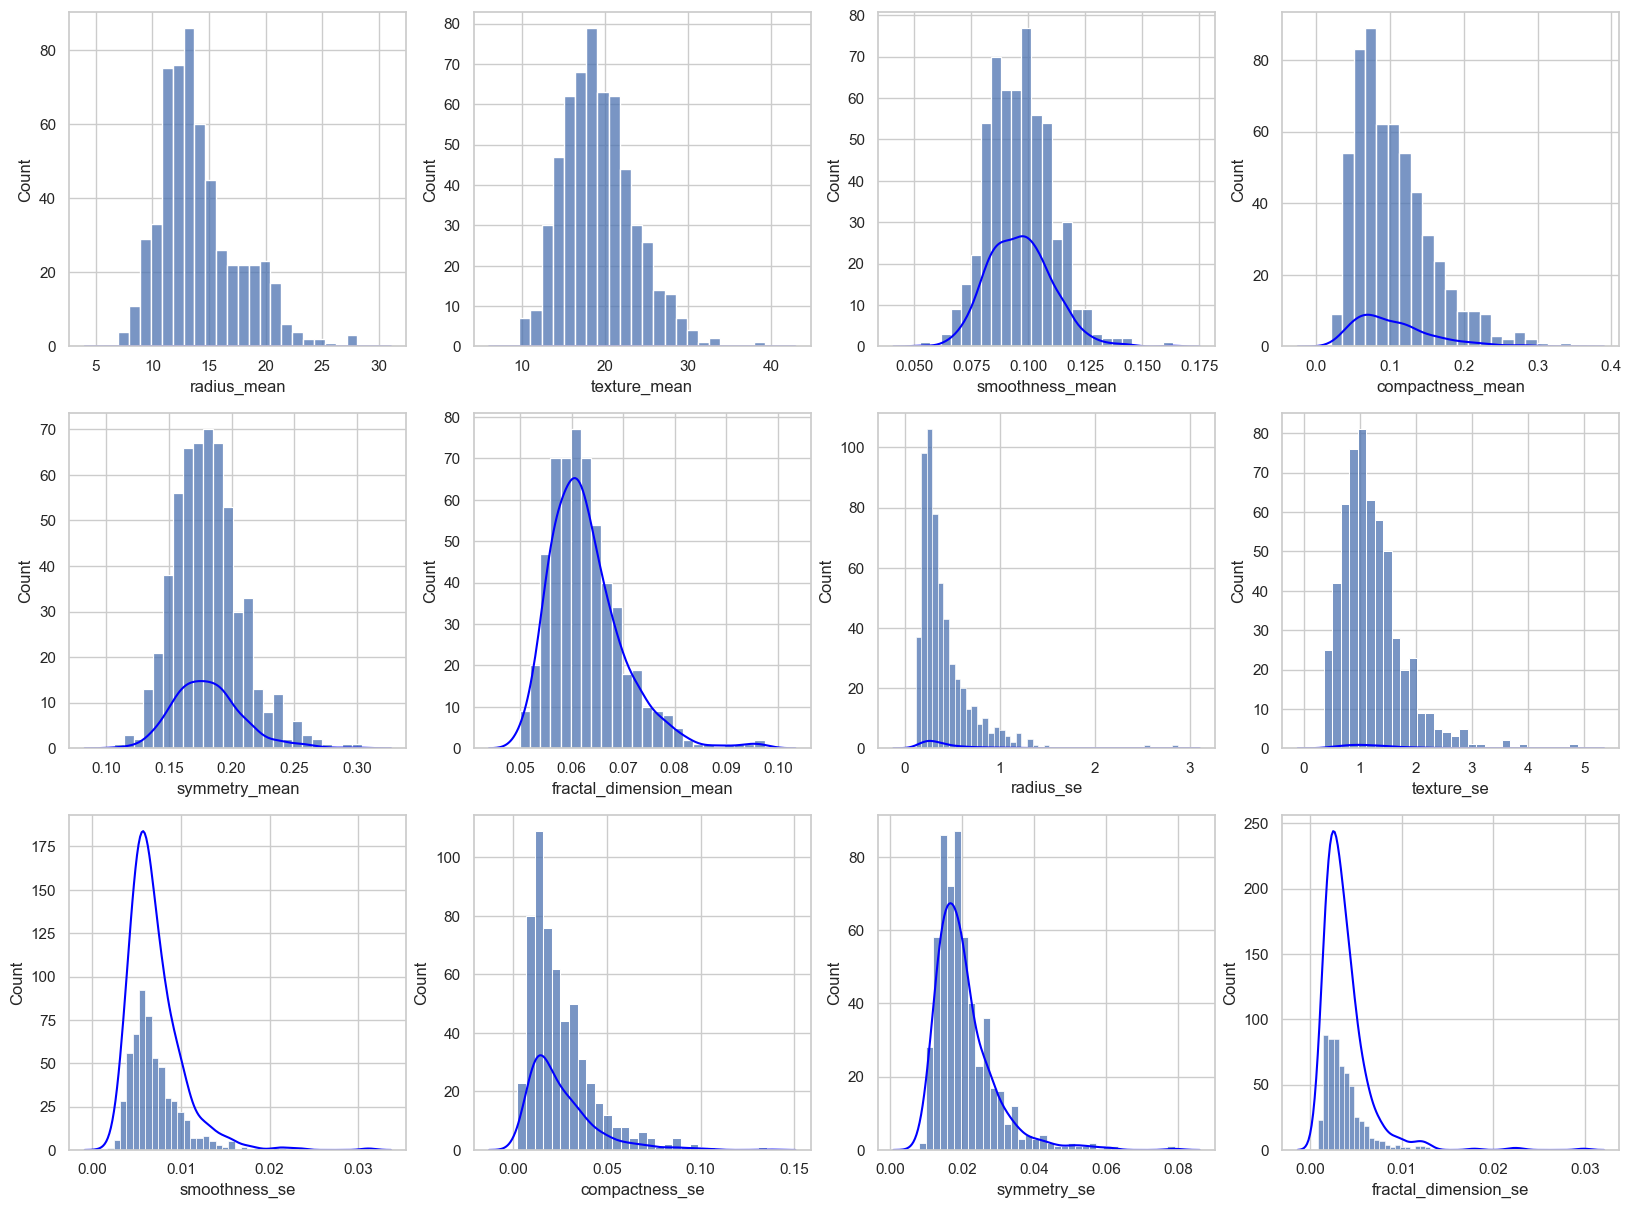

In [ ]:
# Histograma para cada variable incluyendo la curva de densidad usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_cols = data_df.select_dtypes(include=['float64', 'int64'])

# Crear un histograma para cada variable
plt.figure(figsize=(20,20))
plt.style.use('seaborn-deep')

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_df[column])
    sns.kdeplot(data_df[column], color='blue')

# Mostrar el gráfico
plt.show()

In [ ]:
# genera skew_cols las variables con sesgo positivo
skew_cols = data_df.select_dtypes(include=['float64', 'int64']).skew()[data_df.select_dtypes(include=['float64', 'int64']).skew() > 1].index.tolist()
print(skew_cols)


['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


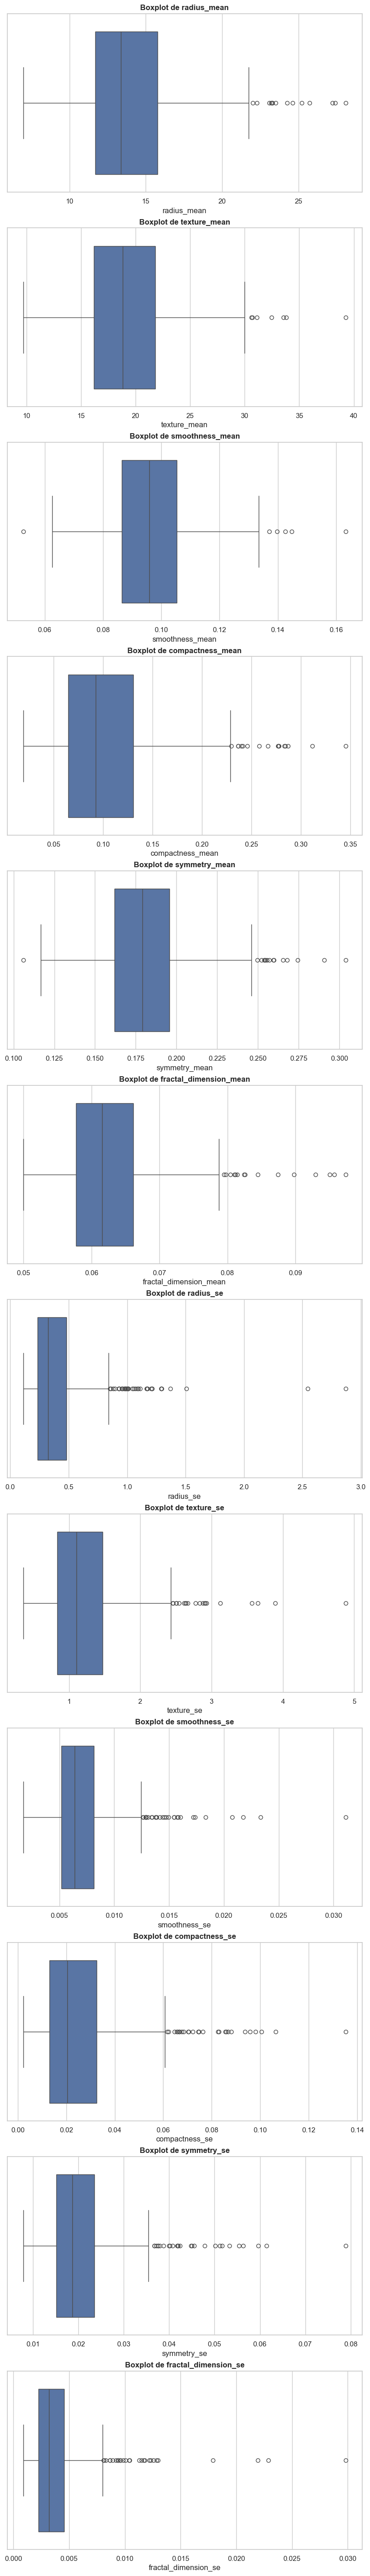

In [ ]:
numeric_cols = data_df.select_dtypes(include='number').columns.tolist()

num_plots = len(numeric_cols)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots), sharey=True)

for i, variable in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(x=variable, data=data_df, ax=ax)
    ax.set_title(f"Boxplot de {variable}", fontweight='bold')

plt.show()

In [ ]:
# guarda en una variable los nombres de las columnas que tienen valores numericos
numeric_cols = data_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Guardar en una variable scale_cols aquellas que no se encuentren en el intervalo [0,1]
scale_cols = [col for col in numeric_cols if ((data_df[col].max() > 1) or (data_df[col].min() < 0))]

# Mostrar el resultado
print(scale_cols)

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
# Obtiene los datos desde archivo csv
data_df = pd.read_csv('data.csv')

# Convertir id como indice
data_df.set_index('id', inplace=True)

# Separa las variables predictoras de la variable objetivo, donde X son las variables predictoras y y la variable objetivo, siendo diagnosis la variable objetivo
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']

# Separa los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Separa los datos de entrenamiento y prueba, usando el 20% de los datos para prueba y un random state de 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
# Obtiene las columnas _worst del dataset
worst_cols = X_train.filter(like='_worst').columns.tolist()

# Columnas con alta correlacion
highly_correlated = ['perimeter_mean', 'area_mean', 'concavity_mean','concave points_mean','perimeter_se','area_se', 'concavity_se', 'concave points_se']

# Concatenar worst_cols y highly_correlated
cols_to_drop = worst_cols + highly_correlated
print(cols_to_drop)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.preprocessing import StandardScaler

def drop_columns(df, cols_to_drop):
    return df.drop(cols_to_drop, axis=1)

# Crear un transformador para eliminar los datos
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns, kw_args={'cols_to_drop': cols_to_drop}), X_train.columns)
    ],
    remainder='passthrough'
)

X_train_prepared = preprocessing.fit_transform(X_train)

In [ ]:
from sklearn import set_config
set_config(display="text")
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_cols',
                                 FunctionTransformer(func=<function drop_columns at 0x0000013C40ED6340>,
                                                     kw_args={'cols_to_drop': ['radius_worst',
                                                                               'texture_worst',
                                                                               'perimeter_worst',
                                                                               'area_worst',
                                                                               'smoothness_worst',
                                                                               'compactness_worst',
                                                                               'concavity_worst',
                                                                               'concave '
                                     

In [ ]:
# extra code – shows that we can get a DataFrame out if we want
X_train_prepared_fr = pd.DataFrame(
    X_train_prepared)
X_train_prepared_fr.head(2)

0      1       2       3       4        5       6       7         8   \
0  17.99  20.66  0.1036  0.1304  0.1992  0.06069  0.4537  0.8733  0.007231   
1  20.29  14.34  0.1003  0.1328  0.1809  0.05883  0.7572  0.7813  0.011490   

        9        10        11  
0  0.02772  0.01414  0.003336  
1  0.02461  0.01756  0.005115

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
# Importar la función para calcular la matriz de confusión
from sklearn.metrics import confusion_matrix
# Importar la función para calcular la exhaustividad
from sklearn.metrics import recall_score
# Importar la función para calcular la exactitud
from sklearn.metrics import accuracy_score
# Importar la función para calcular la precisión
from sklearn.metrics import precision_score

# Crear un pipeline con preprocesamiento y el modelo de regresión logística
logr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
logr_model.fit(X_train, y_train)

# Predecir los valores de la variable objetivo para los datos de prueba
y_pred = logr_model.predict(X_test)

In [ ]:
def classification_model_evaluation(positive_class, y_test, y_pred):
    # Importar la función para calcular la matriz de confusión
    from sklearn.metrics import confusion_matrix
    # Importar la función para calcular la exhaustividad
    from sklearn.metrics import recall_score
    # Importar la función para calcular la exactitud
    from sklearn.metrics import accuracy_score
    # Importar la función para calcular la precisión
    from sklearn.metrics import precision_score
    # Calcular la exactitud
    print("The accuracy is {}".format(accuracy_score(y_test, y_pred)))
    # Calcular la exactitud
    print("The precision is {}".format(precision_score(y_test, y_pred, pos_label=positive_class)))
    # Calcular la exhaustividad
    print("The recall is {}".format(recall_score(y_test, y_pred, pos_label=positive_class)))


In [ ]:
confusion_matrix(y_test, y_pred, labels=['B', 'M'])

array([[68,  4],
       [10, 32]], dtype=int64)

In [ ]:
classification_model_evaluation('B', y_test, y_pred)

The accuracy is 0.8771929824561403
The precision is 0.8717948717948718
The recall is 0.9444444444444444


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FunctionTransformer, Pipeline
from sklearn.linear_model import LogisticRegression
# Importar minmax_scale
from sklearn.preprocessing import MinMaxScaler


def drop_columns(df, cols_to_drop):
    return df.drop(cols_to_drop, axis=1)

# Definir una función para aplicar la raíz cuadrada a un DataFrame
def sqrt_transform(df):
    return df.apply(np.sqrt)

# aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`)

# escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`)
preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns, kw_args={'cols_to_drop': cols_to_drop}), X_train.columns),
        ('sqrt_transform', FunctionTransformer(sqrt_transform), skew_cols),
        ('scale', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

# Crear un pipeline con preprocesamiento y el modelo de regresión logística
logr_model2 = Pipeline(steps=[
    ('preprocessing2', preprocessing2),
    ('logistic_regression', LogisticRegression())
])



In [ ]:
logr_model2

Pipeline(steps=[('preprocessing2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_cols',
                                                  FunctionTransformer(func=<function drop_columns at 0x0000013C473A8040>,
                                                                      kw_args={'cols_to_drop': ['radius_worst',
                                                                                                'texture_worst',
                                                                                                'perimeter_worst',
                                                                                                'area_worst',
                                                                                                'smoothness_worst',
                                                                                                'compactness_worst',
                                     

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
# Ajustar el pipeline a los datos de entrenamiento
logr_model2.fit(X_train, y_train)

# Predecir los valores de la variable objetivo para los datos de prueba
y_pred2 = logr_model2.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred2, labels=['B', 'M'])

array([[68,  4],
       [10, 32]], dtype=int64)

In [ ]:
classification_model_evaluation('B', y_test, y_pred2)

The accuracy is 0.8771929824561403
The precision is 0.8717948717948718
The recall is 0.9444444444444444


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
preprocessing3 = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns, kw_args={'cols_to_drop': cols_to_drop}), X_train.columns),
        ('sqrt_transform', FunctionTransformer(sqrt_transform), skew_cols),
        ('scale', StandardScaler(), [col for col in X_train.columns if col not in cols_to_drop])
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessing3.fit_transform(X_train)

In [ ]:
X_train_scaled

array([[17.99      , 20.66      ,  0.1036    , ...,  0.10582633,
        -0.77103134, -0.17532873],
       [20.29      , 14.34      ,  0.1003    , ..., -0.06600412,
        -0.35741438,  0.46779799],
       [ 9.        , 14.4       ,  0.07005   , ..., -1.15593959,
         0.78547458, -0.60299535],
       ...,
       [17.2       , 24.52      ,  0.1071    , ...,  1.67716332,
        -0.63436843,  0.89582612],
       [14.03      , 21.25      ,  0.0907    , ..., -0.66160935,
        -0.95365169, -0.32390944],
       [13.03      , 18.42      ,  0.08983   , ..., -1.15505557,
         0.74919239, -0.73892321]])

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [ ]:
# Creamos un modelo con PCA explicando el 90% de la varianza de X
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
x_projected = pca.fit_transform(X_train_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

0         1         2         3         4         5         6  \
0  3.228542  2.717883 -0.320649 -0.791135 -0.280555  0.414776 -0.157381   
1 -0.848125  8.152597  0.439504  0.997296  0.466719  1.321233 -0.798147   
2 -7.433596 -2.180258 -0.552238  0.968121 -0.095923 -1.007983 -0.280362   
3 -5.754030  1.159582 -0.640403 -0.058845  1.242864 -0.837651  0.137343   
4 -5.030236  0.704914 -1.200295  1.299602 -0.300541 -0.315342 -1.087289   

          7         8  
0 -0.508193 -0.510322  
1 -0.393185 -0.522590  
2  0.260005 -0.076661  
3  0.207474 -0.001566  
4  0.111927  0.726676

In [ ]:
print("The eigen values for the covariance matrix of our data are", list(np.round(pca.explained_variance_, decimals=5)))

The eigen values for the covariance matrix of our data are [24.55389, 11.41951, 4.27123, 1.4342, 0.98257, 0.74418, 0.54617, 0.365, 0.29718]


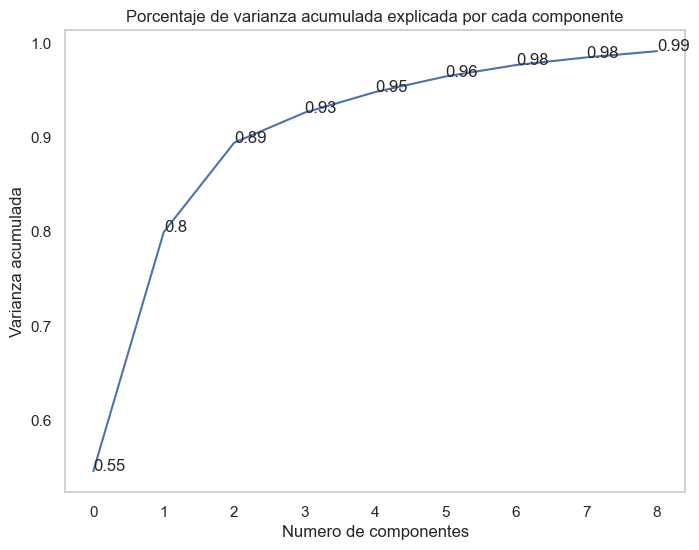

Porcentaje de varianza acumulada explicada por cada componente:
[0.54573637 0.79954725 0.89447984 0.92635646 0.94819513 0.96473528
 0.97687457 0.98498704 0.99159227]
Porcentaje de varianza explicada por cada componente:
[0.54573637 0.25381088 0.09493259 0.03187662 0.02183867 0.01654015
 0.01213929 0.00811248 0.00660523]
Numero de componentes que explican mas del 90% de la varianza:
9


In [ ]:
# Genera la curva de porcentaje de varianza acumulada por cada componente
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Porcentaje de varianza acumulada explicada por cada componente')
plt.grid()  # Agrega un grid a la gráfica
# Agrega etiquetas con los valores de cada varianza
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
for i, varianza in enumerate(varianza_acumulada):
    plt.text(i, varianza, str(round(varianza, 2)))

plt.show()

# Se observa el porcentaje de varianza acumulada explicada por cada componente
np.cumsum(pca.explained_variance_ratio_)
print('Porcentaje de varianza acumulada explicada por cada componente:')
print(np.cumsum(pca.explained_variance_ratio_))

# Se observa el porcentaje de varianza explicada por cada componente
pca.explained_variance_ratio_

# Se observa el porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente:')
print(pca.explained_variance_ratio_)

# Se observa el numero de componentes que explican el 90% de la varianza
print('Numero de componentes que explican mas del 90% de la varianza:')
print(pca.n_components_)

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
# Escalar las variables predictoras isando StandardScaler
from sklearn.preprocessing import StandardScaler
# Aplica un PCA para el conjunto escalado y determna el numero de componentes para 99% de la varianza
from sklearn.decomposition import PCA
# Crear un transformador para aplicar PCA
pca = PCA(n_components=0.99)

# Crear un pipeline con preprocesamiento y el modelo de regresión logística
logr_model3 = Pipeline(steps=[
    ('preprocessing3', preprocessing3),
    ('pca', pca),
    ('logistic_regression', LogisticRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
logr_model3.fit(X_train, y_train)

# Predecir los valores de la variable objetivo para los datos de prueba
y_pred3 = logr_model3.predict(X_test)

confusion_matrix(y_test, y_pred3, labels=['B', 'M'])



array([[69,  3],
       [ 6, 36]], dtype=int64)

In [ ]:
classification_model_evaluation('B', y_test, y_pred3)

The accuracy is 0.9210526315789473
The precision is 0.92
The recall is 0.9583333333333334


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

La métrica más importante es la sensibilidad. La sensibilidad es la probabilidad de que el modelo clasifique correctamente a un paciente con la enfermedad.
La sensibilidad es importante porque es crucial que un modelo de diagnóstico médico sea capaz de identificar correctamente a los pacientes con la enfermedad. Si el modelo no es sensible, es posible que se pierdan pacientes con la enfermedad, lo que puede tener graves consecuencias.  
El threshold se puede ajustar para lograr un equilibrio entre la sensibilidad y la especificidad. Si se desea aumentar la sensibilidad, se puede disminuir el threshold. Sin embargo, esto también puede reducir la especificidad.